#Using Naive Bayes:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.columns = ['Category', 'Message']
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

<Axes: xlabel='Category', ylabel='count'>

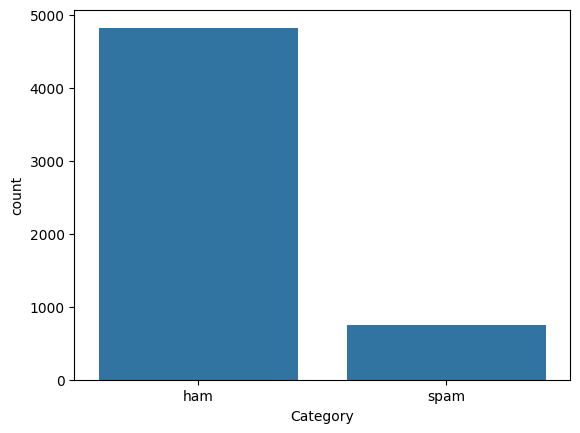

In [7]:
sns.countplot(data=df, x='Category')

In [8]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Testing
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [13]:
# Test with our dataset
df['Message'][:20].apply(process)

,Message
0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joke, wif, u, oni]"
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, dont, think, goe, usf, live, around, tho..."
5,"[freemsg, hey, darl, 3, week, word, back, id, ..."
6,"[even, brother, like, speak, treat, like, aid,..."
7,"[per, request, mell, mell, oru, minnaminungint..."
8,"[winner, valu, network, custom, select, receiv..."
9,"[mobil, 11, month, u, r, entitl, updat, latest..."


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['Message'])
# |Lets check what values it gives for a message

mess = df.iloc[2]['Message']
print(mess)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [18]:
print(tfidfv.transform([mess]))

  (0, 7836)	0.18922211924358542
  (0, 7802)	0.1444783724338207
  (0, 7363)	0.12346584141787843
  (0, 7181)	0.21927308864454476
  (0, 7037)	0.11769363090874861
  (0, 5925)	0.16041470812644235
  (0, 5883)	0.2332459936878955
  (0, 5836)	0.2332459936878955
  (0, 4645)	0.1579816767393508
  (0, 3119)	0.11514727539831593
  (0, 2995)	0.1668384095890907
  (0, 2893)	0.466491987375791
  (0, 2773)	0.35749182684556086
  (0, 2265)	0.20031303792581406
  (0, 2094)	0.19532589225043415
  (0, 1191)	0.1668384095890907
  (0, 841)	0.21927308864454476
  (0, 432)	0.2253768616513935
  (0, 419)	0.2253768616513935
  (0, 412)	0.09975308593934878
  (0, 72)	0.2332459936878955


In [20]:
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names_out()[i],sep='\t') # Use get_feature_names_out()

index	idf	tfidf	term
72	8.5271	0.2332	08452810075over18
412	3.6468	0.0998	2
419	8.2394	0.2254	2005
432	8.2394	0.2254	21st
841	8.0163	0.2193	87121
1191	6.0993	0.1668	appli
2094	7.1408	0.1953	comp
2265	7.3231	0.2003	cup
2773	6.5346	0.3575	entri
2893	8.5271	0.4665	fa
2995	6.0993	0.1668	final
3119	4.2096	0.1151	free
4645	5.7755	0.1580	may
5836	8.5271	0.2332	questionstd
5883	8.5271	0.2332	ratetc
5925	5.8645	0.1604	receiv
7037	4.3027	0.1177	text
7181	8.0163	0.2193	tkt
7363	4.5137	0.1235	txt
7802	5.2819	0.1445	win
7836	6.9176	0.1892	wkli


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.20, random_state = 21)
#Train spam_filter

spam_filter.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x781a2a72e710>)),
                ('classifier', MultinomialNB())])

In [25]:
predictions = spam_filter.predict(x_test)
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 41


In [26]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       999
        spam       0.74      0.99      0.85       116

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



In [27]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'

# Using SVM:

Import Libraries:

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Loading Dataset:

In [29]:
df=pd.read_csv('/content/spam.csv')

Text(0.5, 1.0, 'Pie chart')

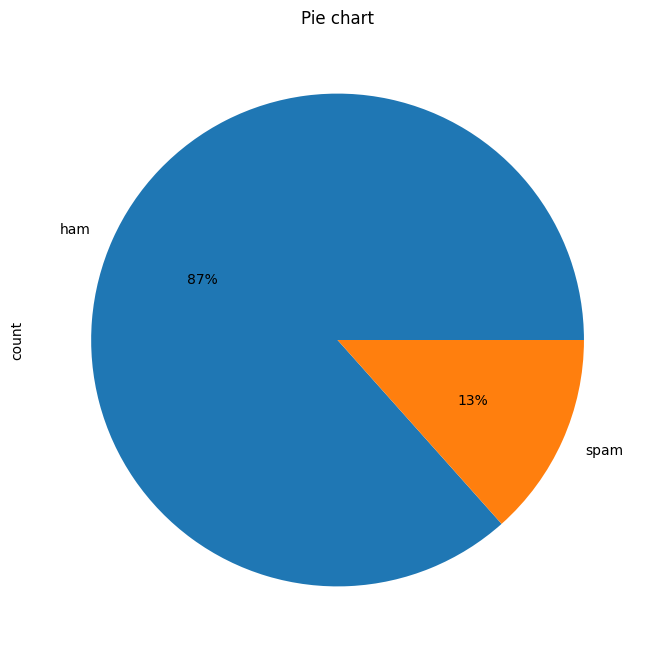

In [30]:
plt.figure(figsize = (8, 8))
df['Category'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Pie chart')

Train Test split:


In [31]:
x = df['Message'].values
y = df['Category'].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

Converting String to integers:

In [32]:
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

Applying SVM Algorithm:

In [33]:
model = SVC(random_state = 0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [34]:
model.score(x_test,y_test)

0.9820627802690582

In [35]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       0.90      0.86      0.88       999
        spam       0.11      0.16      0.13       116

    accuracy                           0.78      1115
   macro avg       0.50      0.51      0.50      1115
weighted avg       0.82      0.78      0.80      1115



In [36]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'